### Access 10k sample spectrogram PNGs from Object Store

In [1]:
import sys
import re
from dateutil import parser
import glob
import math
import string
import time
import datetime
import requests
import cPickle as pickle
from io import BytesIO
from struct import unpack
from math import sqrt
import numpy as np
from numpy import fft
from scipy import stats
import matplotlib.pyplot as plt
from os import listdir
from pyspark.sql.types import *
from pyspark.sql import SQLContext
from pyspark.sql import Row
import pylab
from PIL.Image import fromarray
from IPython.display import FileLink, FileLinks
from IPython.display import Image, display, display_png

%matplotlib inline

In [2]:
# Setup Swift-Spark driver function
def config_hadoop(name, auth_url, username, password, auth_method='basic64'):
    prefix = 'fs.swift.service.' + name
    hconf = sc._jsc.hadoopConfiguration()
#     hconf.setInt('fs.swift.blocksize', 32768)  # https://hadoop.apache.org/docs/stable/hadoop-openstack/index.html
#     hconf.setInt('fs.swift.partsize', 32768)
#     hconf.setInt('fs.swift.requestsize', 8080)
    hconf.setInt('fs.swift.connect.timeout', 15000)
    hconf.setInt('fs.swift.socket.timeout', 60000)
    hconf.setInt('fs.swift.connect.retry.count', 10)
#     hconf.setInt('fs.swift.connect.throttle.delay', 0)
    hconf.set(prefix + '.auth.url', auth_url)
    hconf.set(prefix + '.username', username)
    hconf.set(prefix + '.tenant', username)
    hconf.set(prefix + '.auth.endpoint.prefix', 'endpoints')
    hconf.setInt(prefix + '.http.port', 8080)
    hconf.set(prefix + '.apikey', password)
    hconf.setBoolean(prefix + '.public', False)
    hconf.set(prefix + '.use.get.auth', auth_method)
    hconf.setBoolean(prefix + '.location-aware', False)
    hconf.set(prefix + '.password', password)

In [3]:
# CONFIDENTIAL - Object Store access setup - change first parameter (name) throughout when stale errors occur
config_hadoop('seticompamps','https://dal05.objectstorage.service.networklayer.com/auth/v1.0',
              'IBMOS294544-4:npoore@us.ibm.com','abde9540378cd1e662de10df155ea50ccd88a6137af5575cc639957e6b635b7d', 'true')
# (SFTP download of the acapngflat and acapng folders is possible with above credentials 
# @ dal05.objectstorage.softlayer.net)

# Container acapngflat contains 10,000 sample ACA (archive-compamps) spectrogram PNGs without a folder structure
# (acapng contains the same 10k samples but with a date/activityid folder structure)

# Download a small sample of waterfall plots. This uses filename wildcards to limits the example to the waterfall plots cpatured on 6th of March 2013
compamps = sc.binaryFiles('swift://acapngflat.seticompamps/2013-03-06_*')

pngs = compamps.collect()

swift://acapngflat.seticompamps/2013-03-06_02-40-58_UTC.act153.dx1003.id-0.L.archive-compamp.png


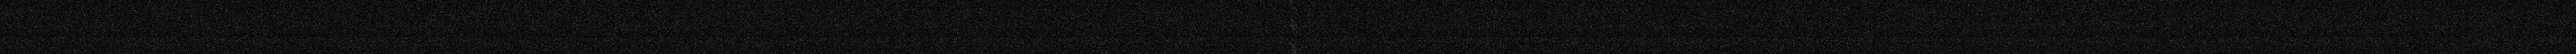

swift://acapngflat.seticompamps/2013-03-06_02-40-58_UTC.act153.dx1008.id-2.R.archive-compamp.png


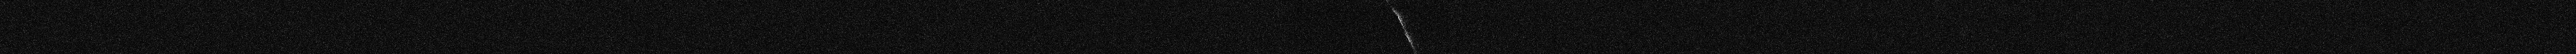

swift://acapngflat.seticompamps/2013-03-06_02-40-58_UTC.act153.dx1010.id-4.R.archive-compamp.png


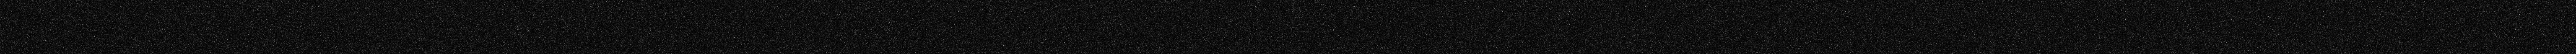

swift://acapngflat.seticompamps/2013-03-06_02-40-58_UTC.act153.dx1016.id-2.L.archive-compamp.png


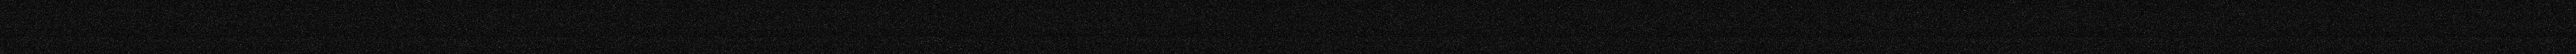

swift://acapngflat.seticompamps/2013-03-06_02-40-58_UTC.act153.dx3006.id-6.L.archive-compamp.png


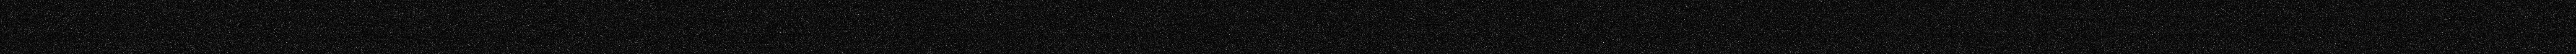

swift://acapngflat.seticompamps/2013-03-06_02-41-01_UTC.act153.dx1016.id-3.R.archive-compamp.png


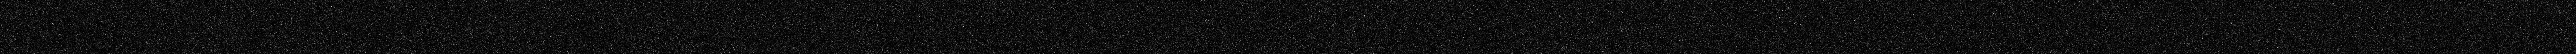

swift://acapngflat.seticompamps/2013-03-06_02-41-03_UTC.act153.dx3010.id-2.R.archive-compamp.png


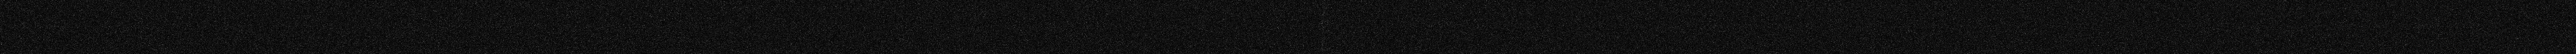

swift://acapngflat.seticompamps/2013-03-06_02-41-08_UTC.act153.dx1009.id-10.L.archive-compamp.png


In [ ]:
# Replace this code with whatever iteration of PNG processing you want to perform. This cell simply does a display_png for illustrative purposes.

# Right-click each PNG, save or open in new window to zoom in
for png in pngs:
    print png[0]
    display_png(Image(png[1]))